# Tree comparison

In [1]:
t1 = "/Users/adel.schmucklermann/Desktop/FoPra/KLK/KLK.newick"
t2 = "/Users/adel.schmucklermann/Desktop/FoPra/vibe_KLK_prott5/tree_vibe.newick"

In [2]:
from ete3 import Tree

tree1_ete = Tree(t1)
tree2_ete = Tree(t2)


#results = tree1.compare(tree2,unrooted=True)
#results

rf, max_rf, common_leaves, parts_t1, parts_t2, discard_t1, discart_t2  = tree1_ete.robinson_foulds(tree2_ete,unrooted_trees=True)
print("RF distance is %s over a total of %s" %(rf, max_rf))
print("Partitions in tree2 that were not found in tree1:", len(parts_t1 - parts_t2))
print("Partitions in tree1 that were not found in tree2:", len(parts_t2 - parts_t1))

RF distance is 644 over a total of 846
Partitions in tree2 that were not found in tree1: 313
Partitions in tree1 that were not found in tree2: 331


In [3]:
import dendropy 
from dendropy import Tree 
from dendropy.calculate import treecompare

tns = dendropy.TaxonNamespace()
tree1 = Tree.get(path=t1,
        schema="newick",taxon_namespace=tns)#,case_sensitive_taxon_labels=True)
tree2 = Tree.get(
        path=t2,
        schema="newick",taxon_namespace=tns)#,case_sensitive_taxon_labels=True)

#!!!! Problem with reading case insensitive leaf nodes !!!!

tree1.encode_bipartitions()
tree2.encode_bipartitions()

print("euclidean_distance: "+str(treecompare.euclidean_distance(tree1, tree2)))
print("symmetric_difference: "+str(treecompare.symmetric_difference(tree1, tree2)))
print("false_positives_and_negatives: "+str(treecompare.false_positives_and_negatives(tree1, tree2)))
print("robinson_foulds_distance: "+str(treecompare.robinson_foulds_distance(tree1, tree2)))

euclidean_distance: 4.6760938308796725
symmetric_difference: 660
false_positives_and_negatives: (338, 322)
robinson_foulds_distance: 107.54865871900013


# Draw Tree with Circos

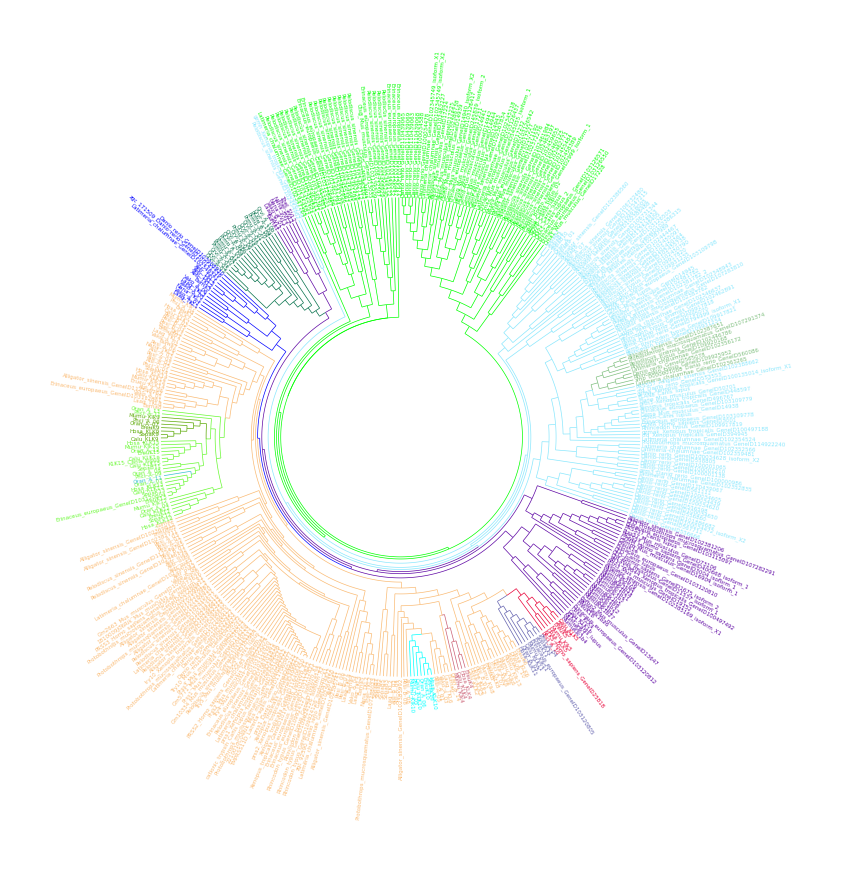

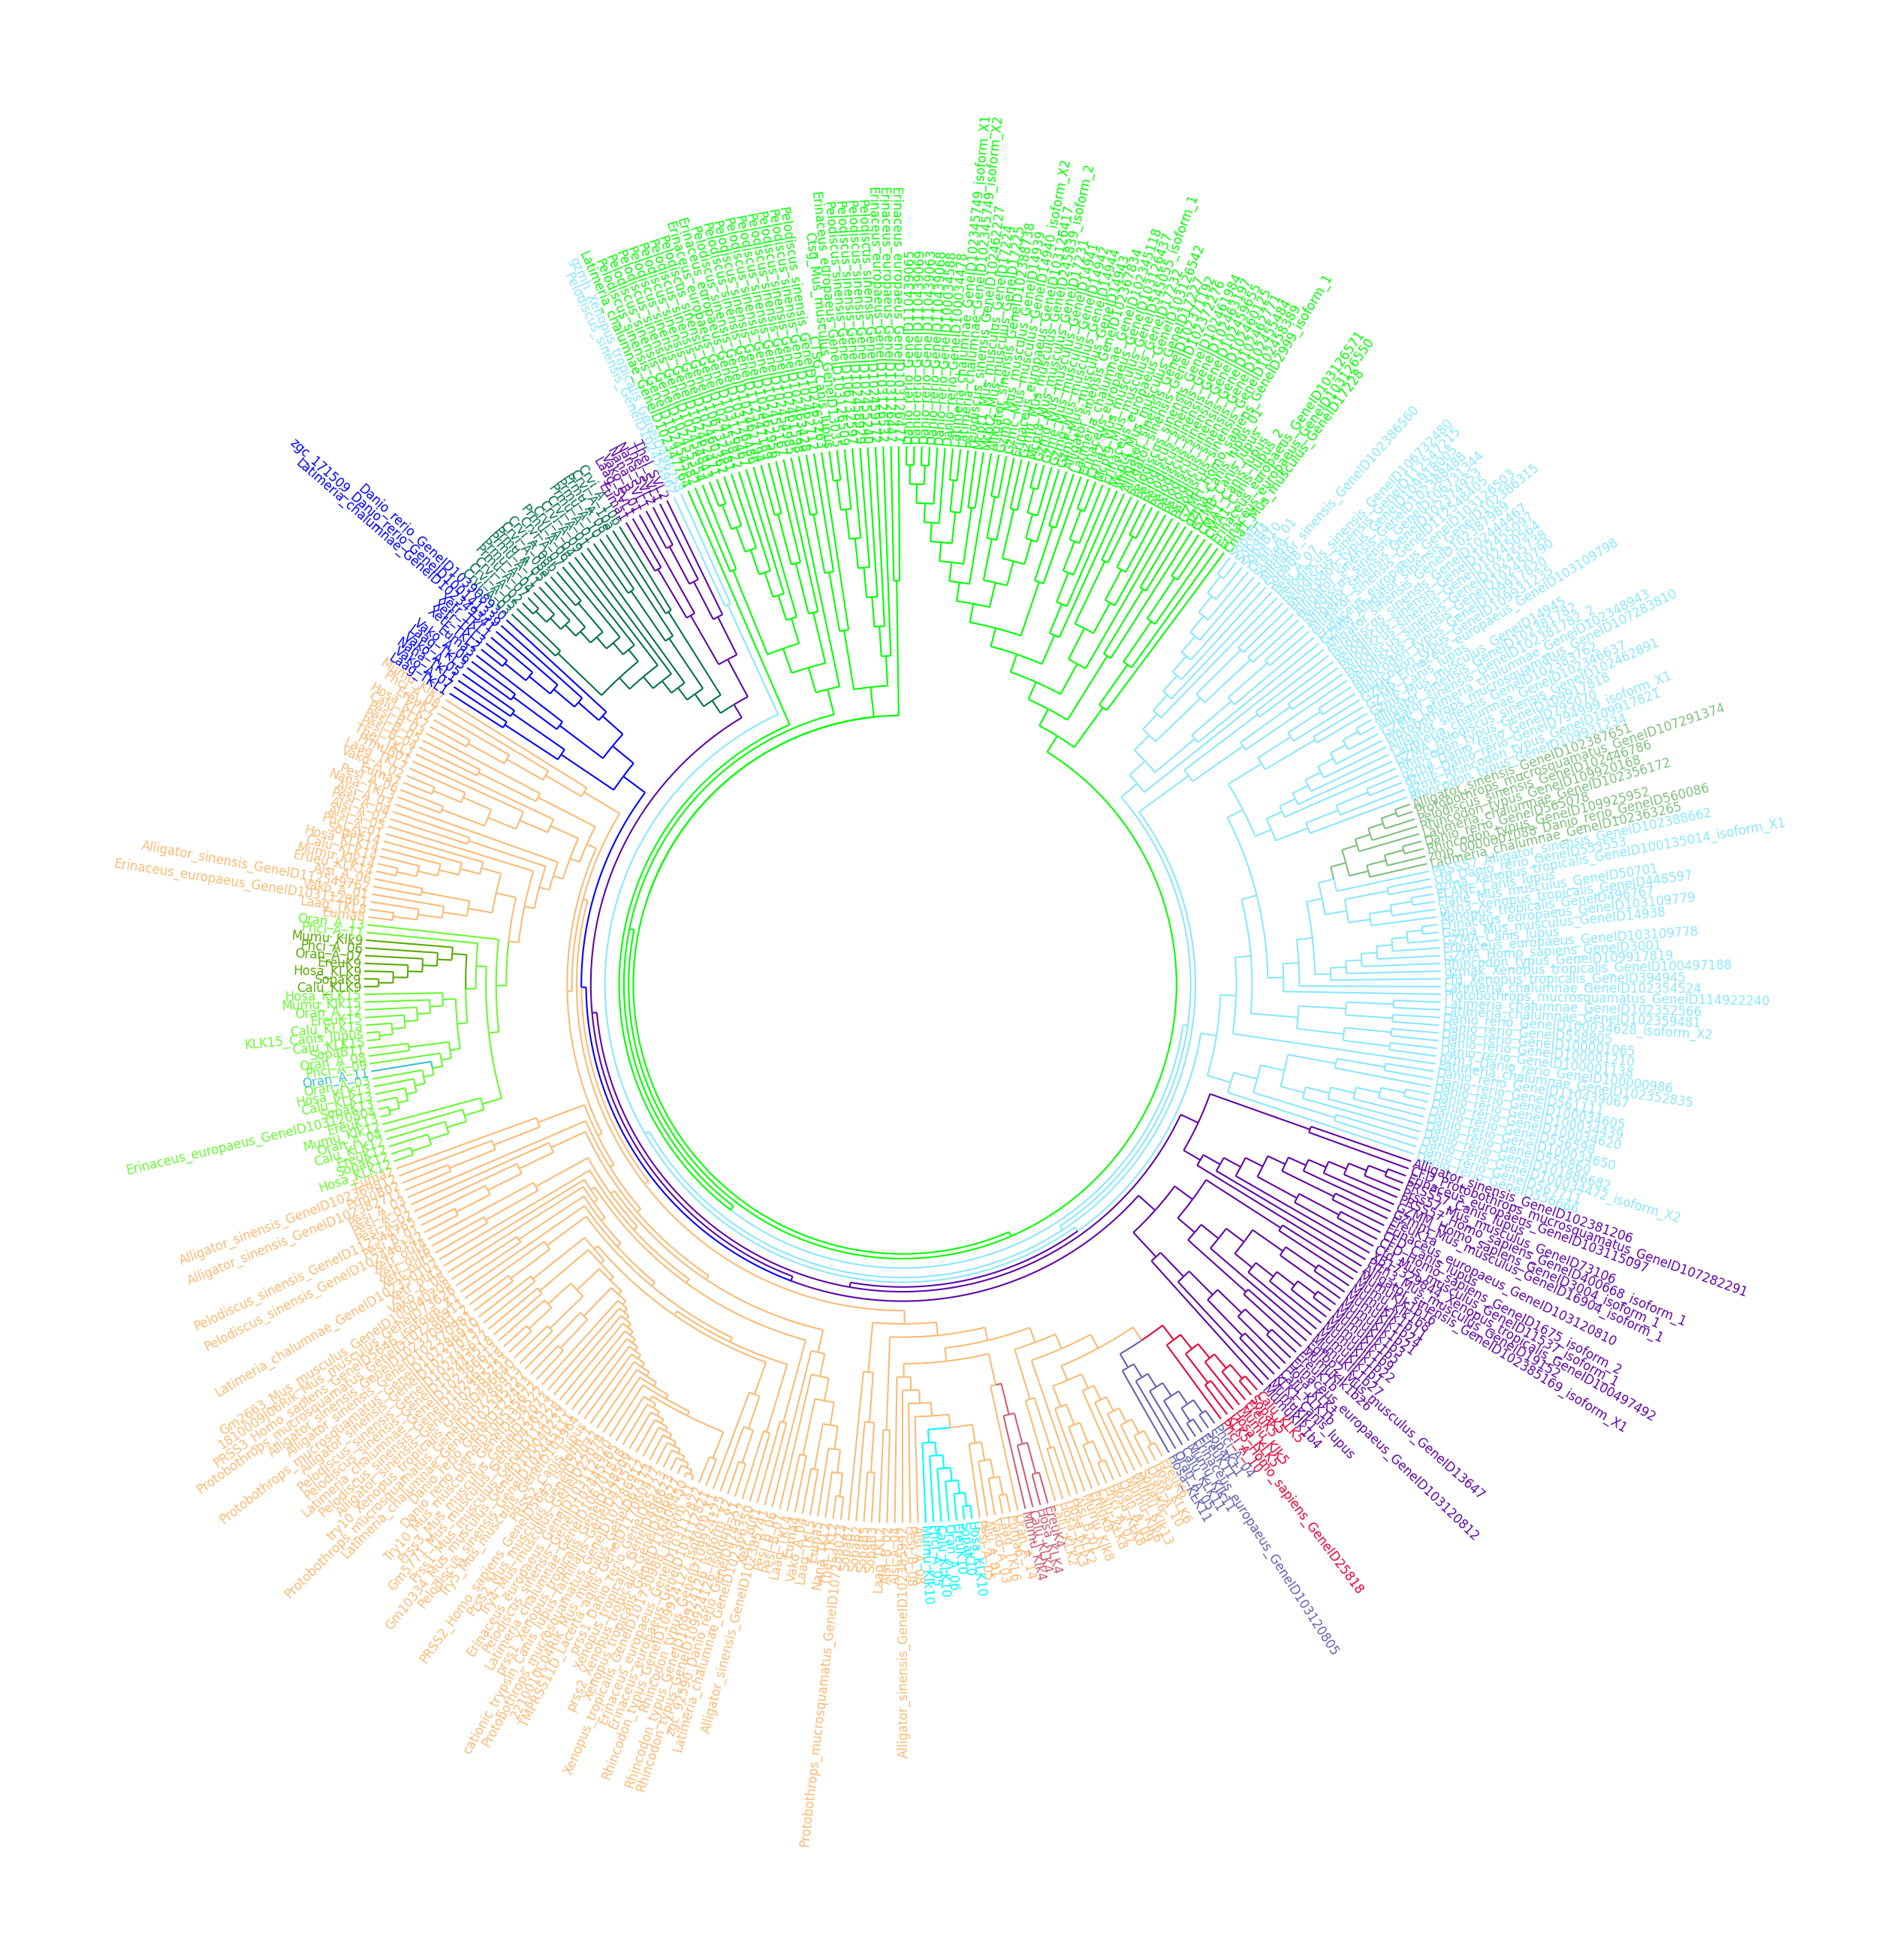

In [4]:
from pycirclize import Circos
from io import StringIO
from Bio import Phylo
import csv


tree_in = t2

#read color_file
dict_color = {}
with open("/Users/adel.schmucklermann/Desktop/FoPra/KLK/KLK_iTOL.txt") as csv_file:
    for row in csv.reader(csv_file, delimiter='\t'):
        if len(row) > 1:
            key = row[2]
            if key in dict_color:
                dict_color[key].append(row[0])
            else:
                dict_color[key] = [row[0]]
                
list_of_color = [(value,key) for key, value in dict_color.items()]                                    


#create tree
tree = Phylo.read(tree_in, "newick")

# Initialize circos sector with tree size
circos = Circos(sectors={"Tree": tree.count_terminals()})
sector = circos.sectors[0]

# Plot tree
track = sector.add_track((50, 100))
track.tree(tree,leaf_label_size=4, node_color_list=list_of_color)

fig = circos.plotfig()
circos.savefig("/Users/adel.schmucklermann/Desktop/FoPra/KLK_prott5.png", dpi=300)